In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv")
df

C:\Users\user\AppData\Local\Temp\ipykernel_14104\2045029417.py:1: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv")


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = df.drop(columns=['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'])

In [5]:
df = df.dropna(how='all')

Karena yang kosong tidak ada data yang numerikal hanya categorikal jadi tidak bisa di cek dengan persebaran normal atau tidak, jadi diisi dengan modus atau dengan groupby modus

In [6]:
df.isna().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137175
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

In [7]:
df = df.rename(columns={'category_name_1':'category'})

In [8]:
index_kosong_status = df[df['status'].isna()].index

In [9]:
df.iloc[index_kosong_status]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
477519,783751.0,NaN,3/15/2018,OTHPCB5A7D8A0BD10E8,8000.0,1.0,8000.0,100479380,Others,NaN,0.0,cod,3/15/2018,Gross,"8,000",2018.0,3.0,2018-3,3-2018,FY18,95141.0
513736,827187.0,NaN,4/16/2018,KABOXF5ABCC75C7E2F7-32,370.0,1.0,2707.0,100513933,Kids & Baby,NaN,0.0,cod,4/16/2018,Gross,370,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513737,827189.0,NaN,4/16/2018,KABSHO5AA77C331466F-11-13 Years,473.0,1.0,2707.0,100513933,Kids & Baby,NaN,0.0,cod,4/16/2018,Gross,473,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513738,827191.0,NaN,4/16/2018,KABBIN5A93E074C501A-8-9 Years,749.0,1.0,2707.0,100513933,Kids & Baby,NaN,0.0,cod,4/16/2018,Gross,749,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513739,827193.0,NaN,4/16/2018,KABLIT59AC117FD51C4-12-13 Years,692.0,1.0,2707.0,100513933,Kids & Baby,NaN,0.0,cod,4/16/2018,Gross,692,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513740,827195.0,NaN,4/16/2018,KABCOL5AB2B8019805C-8-9 Years,423.0,1.0,2707.0,100513933,Kids & Baby,NaN,0.0,cod,4/16/2018,Gross,423,2018.0,4.0,2018-4,4-2018,FY18,105059.0
518706,832777.0,NaN,4/30/2018,ENTCLI5A5DD7D800D6E,6042.0,1.0,6042.0,100517141,Entertainment,NaN,0.0,cod,4/30/2018,Gross,"6,042",2018.0,4.0,2018-4,4-2018,FY18,106036.0
532965,848003.0,NaN,5/14/2018,MATINF5AE310D2D7A1A,13950.0,1.0,13950.0,100527966,Mobiles & Tablets,NaN,0.0,cod,5/14/2018,Gross,"13,950",2018.0,5.0,2018-4,5-2018,FY18,105319.0
542146,857829.0,NaN,5/25/2018,ROO5AE983F2751EA,2280.0,1.0,2280.0,100534786,Superstore,NaN,0.0,cod,5/25/2018,Gross,"2,280",2018.0,5.0,2018-5,5-2018,FY18,109580.0
554962,872154.0,NaN,6/15/2018,BAGPHI5AA665985A58E,2900.0,1.0,949.0,100542483,Beauty & Grooming,NaN,200.0,bankalfalah,6/15/2018,Gross,"2,900",2018.0,6.0,2018-5,6-2018,FY18,109420.0


In [10]:
#Drop Kolom Status yang kosong karena tidak ada yang bisa memastikan dia sudah completed jadi dianggap cancelled
df = df.drop(index=index_kosong_status)

In [11]:
index_kosong_category = df[df['category'].isna()].index

In [12]:
#diisi dengan mode karena tidak ada indikasi yang bisa pake function groupby fill na
df['category'] = df['category'].fillna(df['category'].mode()[0])

In [13]:
df.iloc[index_kosong_category]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
425895,725194.0,order_refunded,1/2/2018,MEFQMO59B0942707B79-L,99.0,2.0,2.0,100442474,Mobiles & Tablets,NaN,346.0,Easypay,1/2/2018,Valid,198,2018.0,1.0,2017-8,1-2018,FY18,59587.0
431194,731122.0,received,1/15/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100445690,Mobiles & Tablets,NaN,0.0,cod,1/15/2018,Valid,99,2018.0,1.0,2017-8,1-2018,FY18,59587.0
432492,732569.0,canceled,1/19/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446481,Mobiles & Tablets,NaN,0.0,bankalfalah,1/19/2018,Gross,99,2018.0,1.0,2017-3,1-2018,FY18,37311.0
432494,732572.0,canceled,1/19/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446483,Mobiles & Tablets,NaN,0.0,bankalfalah,1/19/2018,Gross,99,2018.0,1.0,2017-3,1-2018,FY18,37311.0
432496,732575.0,order_refunded,1/19/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100446485,Mobiles & Tablets,NaN,0.0,cod,1/19/2018,Valid,99,2018.0,1.0,2018-1,1-2018,FY18,85633.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535580,850770.0,canceled,5/16/2018,WOFWIN5AE96D8C7227F-M,490.0,1.0,1130.0,100530045,Women's Fashion,NaN,0.0,cod,5/16/2018,Gross,490,2018.0,5.0,2018-5,5-2018,FY18,108624.0
541935,857608.0,canceled,5/25/2018,MATHUA5A793D534F5D4,29380.0,1.0,29380.0,100534652,Mobiles & Tablets,NaN,0.0,bankalfalah,5/25/2018,Gross,"29,380",2018.0,5.0,2018-5,5-2018,FY18,109187.0
549323,865834.0,received,6/4/2018,MATXIA5AF704F510623,26499.0,1.0,26499.0,100538802,Mobiles & Tablets,NaN,0.0,cod,6/4/2018,Valid,"26,499",2018.0,6.0,2018-6,6-2018,FY18,110358.0
568084,886714.0,received,7/18/2018,SOGAMB5A09BA25616A0,190.0,1.0,2080.0,100551516,Soghaat,NaN,0.0,cod,7/18/2018,Valid,190,2018.0,7.0,2016-9,7-2018,FY19,7947.0


In [14]:
index_kosong_sku = df[df['sku'].isna()].index

In [15]:
# Mengisi SKU kosong dengan mode, karena yang berhubungan dengan sku hanya category tapi category disini juga tetap kosong, jadi diisi dengan MODE
df['sku'] = df['sku'].fillna(df['sku'].mode()[0])

In [16]:
df = df.reset_index().drop(columns='index')

In [17]:
index_category_N = []

for i in range(len(df['category'])):
    if df['category'][i] == '\\N':
        index_category_N.append(i)

In [18]:
index_kosong_custom_since = df[df['Customer Since'].isna()].index

In [19]:
df.iloc[index_kosong_custom_since]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
427377,726862.0,order_refunded,1/5/2018,BAGLOR5A12C5C756AE5,209.0,1.0,1074.0,100443451,Beauty & Grooming,NaN,0.0,cod,1/5/2018,Valid,209,2018.0,1.0,NaN,1-2018,FY18,NaN
427378,726863.0,order_refunded,1/5/2018,WOFGUL59C24CC9BE5D9,720.0,1.0,1074.0,100443451,Women's Fashion,NaN,0.0,cod,1/5/2018,Valid,720,2018.0,1.0,NaN,1-2018,FY18,NaN
427379,726864.0,order_refunded,1/5/2018,BAGNAD59E0AAC250E6D,145.0,1.0,1074.0,100443451,Beauty & Grooming,NaN,0.0,cod,1/5/2018,Valid,145,2018.0,1.0,NaN,1-2018,FY18,NaN
437567,738191.0,order_refunded,1/31/2018,MEFMUN5A0ACC3A894BE-9,999.0,1.0,1149.0,100449683,Men's Fashion,NaN,0.0,cod,1/31/2018,Valid,999,2018.0,1.0,NaN,1-2018,FY18,NaN
478698,784981.0,received,3/15/2018,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480546,Others,NaN,0.0,Payaxis,3/15/2018,Valid,"16,000",2018.0,3.0,NaN,3-2018,FY18,NaN
478778,785061.0,canceled,3/15/2018,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480623,Others,NaN,0.0,Easypay_MA,3/15/2018,Gross,"16,000",2018.0,3.0,NaN,3-2018,FY18,NaN
494277,804621.0,canceled,3/27/2018,OTHPCB5AB351ED6A8F2,5000.0,2.0,10000.0,100496269,Others,NaN,0.0,Easypay,3/27/2018,Gross,"10,000",2018.0,3.0,NaN,3-2018,FY18,NaN
495339,805750.0,canceled,3/27/2018,OTHPCB5AB351ECC7118,500.0,2.0,1000.0,100497359,Others,NaN,0.0,Easypay,3/27/2018,Gross,"1,000",2018.0,3.0,NaN,3-2018,FY18,NaN
495944,807010.0,canceled,3/27/2018,OTHPCB5AB351EEC46EC,500.0,4.0,2000.0,100498582,Others,NaN,0.0,Easypay,3/27/2018,Gross,"2,000",2018.0,3.0,NaN,3-2018,FY18,NaN
496920,808287.0,order_refunded,3/27/2018,MEFKAR5A7C138CE9EBD-L,1040.0,1.0,1040.0,100499821,Men's Fashion,NaN,0.0,cod,3/27/2018,Valid,"1,040",2018.0,3.0,NaN,3-2018,FY18,NaN


In [20]:
df[['qty_ordered','price','item_id','grand_total','Month']] = df[['qty_ordered','price','item_id','grand_total','Month']].astype(int)

In [21]:
# drop category yang isinya N karena tidak ada indikasi yang sama denga tabel lain, dan hanya 7000 dari 1,4 juta data jadi insignificant jika di hilangkan hanya 0.5% dari total data
df['category'] = df['category'].fillna('Others')

In [22]:
df = df.reset_index().drop(columns='index')

In [23]:
index_kosong_sales_comm = df[df['sales_commission_code'].isna()].index

In [24]:
index_commission_N = []

for i in range(23):
    if '\\N' in df['sales_commission_code'][i]:
        index_commission_N.append(i)

In [25]:
df = df.reset_index().drop(columns='index')

In [26]:
df['sales_commission_code'].value_counts()

\N                339001
40968               2710
C-LHW-50074         2434
C-RWP-31924         1720
cisb30211           1613
                   ...  
100278139              1
rwp-wah-104124         1
C-FSD-42199            1
Cfsd43702              1
C LHE 45016            1
Name: sales_commission_code, Length: 7226, dtype: int64

In [27]:
#mengganti yang N menjadi others di kolom yang category
kolom = ['status','created_at','sku','increment_id','category','sales_commission_code','payment_method','Working Date','BI Status','Customer Since','M-Y','FY']

for i in kolom:
    df[kolom] = np.where(df[kolom] == '\\N', 'Others', df[kolom])

In [28]:
df['sales_commission_code'] = df['sales_commission_code'].fillna(df['sales_commission_code'].mode()[0])

In [29]:
df.isna().sum()

item_id                   0
status                    0
created_at                0
sku                       0
price                     0
qty_ordered               0
grand_total               0
increment_id              0
category                  0
sales_commission_code     0
discount_amount           0
payment_method            0
Working Date              0
BI Status                 0
 MV                       0
Year                      0
Month                     0
Customer Since           11
M-Y                       0
FY                        0
Customer ID              11
dtype: int64

In [30]:
df.isna().sum()

item_id                   0
status                    0
created_at                0
sku                       0
price                     0
qty_ordered               0
grand_total               0
increment_id              0
category                  0
sales_commission_code     0
discount_amount           0
payment_method            0
Working Date              0
BI Status                 0
 MV                       0
Year                      0
Month                     0
Customer Since           11
M-Y                       0
FY                        0
Customer ID              11
dtype: int64

In [31]:
df['Customer Since'].mode()[0]

'2016-11'

In [32]:
#diisi dengan mode karena tidak ada indikasi bisa diisi berdasarkan kolom lain, kolom tanggal yang ada bulan dan tahun lainya hanya berhubungan dengan
#kapan customer ini pertama kali pesan dan curret order month
df['Customer Since'] = df['Customer Since'].fillna(df['Customer Since'].mode()[0])

In [33]:
index_ID_kosong = df[df['Customer ID'].isna()].index

In [34]:
df['Customer ID'].max()

115326.0

In [35]:
len(df['Customer ID'][index_ID_kosong])

11

In [36]:
#karena customer ID tidak bisa duplicat untuk setiap users, jadi yang kosong saya isi dengan nilai max+1 agar tidak duplikat
for i in range(11):
    a = df['Customer ID'].max()
    df['Customer ID'][index_ID_kosong[i]] = a+1 

C:\Users\user\AppData\Local\Temp\ipykernel_14104\1948855219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer ID'][index_ID_kosong[i]] = a+1


In [37]:
df.isna().sum()

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category                 0
sales_commission_code    0
discount_amount          0
payment_method           0
Working Date             0
BI Status                0
 MV                      0
Year                     0
Month                    0
Customer Since           0
M-Y                      0
FY                       0
Customer ID              0
dtype: int64

In [38]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt 
from operator import attrgetter
from datetime import datetime

In [39]:
from scipy.stats import kstest

In [40]:
df.head()
# df clean

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131,complete,7/1/2016,kreations_YI 06-L,1950,1,1950,100147443,Women's Fashion,Others,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7,2016-7,7-2016,FY17,1.0
1,211133,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240,1,240,100147444,Beauty & Grooming,Others,0.0,cod,7/1/2016,Gross,240,2016.0,7,2016-7,7-2016,FY17,2.0
2,211134,canceled,7/1/2016,Ego_UP0017-999-MR0,2450,1,2450,100147445,Women's Fashion,Others,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7,2016-7,7-2016,FY17,3.0
3,211135,complete,7/1/2016,kcc_krone deal,360,1,60,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7,2016-7,7-2016,FY17,4.0
4,211136,order_refunded,7/1/2016,BK7010400AG,555,2,1110,100147447,Soghaat,Others,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7,2016-7,7-2016,FY17,5.0


In [41]:
df.isna().sum()

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category                 0
sales_commission_code    0
discount_amount          0
payment_method           0
Working Date             0
BI Status                0
 MV                      0
Year                     0
Month                    0
Customer Since           0
M-Y                      0
FY                       0
Customer ID              0
dtype: int64

Mengecek distribusi kolom price

In [42]:
ks_result  = kstest(df['price'],'norm')
ks_result

stat, pvalue = kstest(df['price'], 'norm')
pvalue

0.0

## interpretasi pvalue
- pvalue >    0.05 artinya data diasumsikan berdistrubi normal
- pvalue <=   0.05 artinya data diasumsikan tidak berdistrubi normal


In [43]:
stat, pvalue = kstest(df['price'], 'norm')

if pvalue > 0.05:
    print(f'pvalue= {pvalue:.5f}, pvalue > 0.05, artinya data bisa diasumsikan berdistribusi normal')
else:    
    print(f'pvalue= {pvalue:.5f}, pvalue <= 0.05, artinya data bisa diasumsikan tidak berdistribusi normal')

pvalue= 0.00000, pvalue <= 0.05, artinya data bisa diasumsikan tidak berdistribusi normal


Mengecek distribusi kolom grand price

In [44]:
ks_result  = kstest(df['grand_total'],'norm')
ks_result
stat, pvalue = kstest(df['grand_total'], 'norm')
pvalue

0.0

## interpretasi pvalue
- pvalue >    0.05 artinya data diasumsikan berdistrubi normal
- pvalue <=   0.05 artinya data diasumsikan tidak berdistrubi normal


In [45]:
stat, pvalue = kstest(df['price'], 'norm')

if pvalue > 0.05:
    print(f'pvalue= {pvalue:.5f}, pvalue > 0.05, artinya data bisa diasumsikan berdistribusi normal')
else:    
    print(f'pvalue= {pvalue:.5f}, pvalue <= 0.05, artinya data bisa diasumsikan tidak berdistribusi normal')

pvalue= 0.00000, pvalue <= 0.05, artinya data bisa diasumsikan tidak berdistribusi normal


In [46]:
df['Year'].unique()

array([2016., 2017., 2018.])

Membuat Cohort dan Retention Analysis 

In [47]:
pd.set_option('display.max_columns', None)

In [48]:
df['Working Date'] = pd.to_datetime(df['Working Date'])

In [49]:
df['Customer Since'] = pd.to_datetime(df['Customer Since'])

# 1.Current Order Month = kolom M-Y tanggal pembeliaanya

In [50]:
df['current_order_month'] = df['Working Date'].dt.to_period('M')

# 2.Cohort Month = kolom Customer Since, pembeliaan pertama customer itu

In [51]:
df['cohort_month'] = df.groupby('Customer ID')['Customer Since'].transform('min')

#Potong Hanya Tahun Dan Bulanya Saja
df['cohort_month'] = df['cohort_month'].dt.to_period('M')
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,current_order_month,cohort_month
0,211131,complete,7/1/2016,kreations_YI 06-L,1950,1,1950,100147443,Women's Fashion,Others,0.0,cod,2016-07-01,#REF!,"1,950",2016.0,7,2016-07-01,7-2016,FY17,1.0,2016-07,2016-07
1,211133,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240,1,240,100147444,Beauty & Grooming,Others,0.0,cod,2016-07-01,Gross,240,2016.0,7,2016-07-01,7-2016,FY17,2.0,2016-07,2016-07
2,211134,canceled,7/1/2016,Ego_UP0017-999-MR0,2450,1,2450,100147445,Women's Fashion,Others,0.0,cod,2016-07-01,Gross,"2,450",2016.0,7,2016-07-01,7-2016,FY17,3.0,2016-07,2016-07
3,211135,complete,7/1/2016,kcc_krone deal,360,1,60,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,2016-07-01,Net,360,2016.0,7,2016-07-01,7-2016,FY17,4.0,2016-07,2016-07
4,211136,order_refunded,7/1/2016,BK7010400AG,555,2,1110,100147447,Soghaat,Others,0.0,cod,2016-07-01,Valid,"1,110",2016.0,7,2016-07-01,7-2016,FY17,5.0,2016-07,2016-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584504,905204,cod,8/28/2018,WOFSCE5AE00357AECDE,699,1,849,100562385,Women's Fashion,Others,0.0,cod,2018-08-28,Valid,699,2018.0,8,2018-08-01,8-2018,FY19,115320.0,2018-08,2018-08
584505,905205,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599,1,35899,100562386,Mobiles & Tablets,Others,0.0,bankalfalah,2018-08-28,Gross,"35,599",2018.0,8,2018-08-01,8-2018,FY19,115326.0,2018-08,2018-08
584506,905206,processing,8/28/2018,MATSAM5B6D7208C6D30,129999,2,652178,100562387,Mobiles & Tablets,Others,0.0,bankalfalah,2018-08-28,Gross,"259,998",2018.0,8,2018-07-01,8-2018,FY19,113474.0,2018-08,2018-07
584507,905207,processing,8/28/2018,MATSAM5B1509B4696EA,87300,2,652178,100562387,Mobiles & Tablets,Others,0.0,bankalfalah,2018-08-28,Gross,"174,600",2018.0,8,2018-07-01,8-2018,FY19,113474.0,2018-08,2018-07


In [52]:
df.sort_values(by='current_order_month')

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,current_order_month,cohort_month
0,211131,complete,7/1/2016,kreations_YI 06-L,1950,1,1950,100147443,Women's Fashion,Others,0.0,cod,2016-07-01,#REF!,"1,950",2016.0,7,2016-07-01,7-2016,FY17,1.0,2016-07,2016-07
5900,217776,complete,7/23/2016,kcc_Cool Pocket Perfume,120,1,360,100152208,Beauty & Grooming,Others,0.0,cod,2016-07-23,Net,120,2016.0,7,2016-07-01,7-2016,FY17,1800.0,2016-07,2016-07
5899,217775,complete,7/23/2016,kcc_Bold Pocket Perfume,120,1,360,100152208,Beauty & Grooming,Others,0.0,cod,2016-07-23,Net,120,2016.0,7,2016-07-01,7-2016,FY17,1800.0,2016-07,2016-07
5898,217774,canceled,7/23/2016,infinix_Note 2 Grey,16000,1,16000,100152207,Mobiles & Tablets,Others,0.0,cod,2016-07-23,Gross,"16,000",2016.0,7,2016-07-01,7-2016,FY17,1799.0,2016-07,2016-07
5897,217773,refund,7/23/2016,hol_W-719,990,1,445,100152206,Women's Fashion,Others,0.0,cod,2016-07-23,Valid,990,2016.0,7,2016-07-01,7-2016,FY17,1059.0,2016-07,2016-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576580,896368,received,8/12/2018,WOFYAY5B62B979C3132,509,1,13459,100557070,Women's Fashion,CMUX33202,0.0,cod,2018-08-12,Valid,509,2018.0,8,2018-03-01,8-2018,FY19,97422.0,2018-08,2018-03
576581,896369,received,8/12/2018,WOFLAL5B62B976C86B4,537,1,13459,100557070,Women's Fashion,CMUX33202,0.0,cod,2018-08-12,Valid,537,2018.0,8,2018-03-01,8-2018,FY19,97422.0,2018-08,2018-03
576582,896370,received,8/12/2018,BAGLOR5B4C7A79878E3,129,2,13459,100557070,Beauty & Grooming,CMUX33202,0.0,cod,2018-08-12,Valid,258,2018.0,8,2018-03-01,8-2018,FY19,97422.0,2018-08,2018-03
576573,896361,order_refunded,8/12/2018,WOFYAY5B62B979C3132,509,1,659,100557064,Women's Fashion,Others,0.0,cod,2018-08-12,Valid,509,2018.0,8,2016-07-01,8-2018,FY19,163.0,2018-08,2016-07


# 3. N_Customers

In [53]:
df_cohort = df.groupby(by=['cohort_month','current_order_month']).nunique()[['Customer ID']].reset_index()


In [54]:
df_cohort['period_number'] = (df_cohort['current_order_month'] - df_cohort['cohort_month']).apply(attrgetter('n'))

In [55]:
df_cohort = df_cohort.rename(columns={'Customer ID':'n_customers'})

In [56]:
df_cohort

,cohort_month,current_order_month,n_customers,period_number
0,2016-07,2016-07,2406,0
1,2016-07,2016-08,468,1
2,2016-07,2016-09,391,2
3,2016-07,2016-10,325,3
4,2016-07,2016-11,472,4
...,...,...,...,...
346,2018-06,2018-07,164,1
347,2018-06,2018-08,63,2
348,2018-07,2018-07,1767,0
349,2018-07,2018-08,118,1


In [57]:
df_cohort['current_order_month'].nunique()

26

In [58]:
df_cohort_pivot = df_cohort.pivot_table(
    index= 'cohort_month',
    columns= 'period_number',
    values= 'n_customers'

)
df_cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
cohort_month,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07,2406.0,468.0,391.0,325.0,472.0,277.0,250.0,212.0,244.0,251.0,244.0,179.0,171.0,156.0,73.0,109.0,213.0,93.0,71.0,57.0,88.0,60.0,90.0,69.0,51.0,55.0
2016-08,3097.0,396.0,274.0,422.0,218.0,188.0,153.0,169.0,158.0,175.0,129.0,126.0,124.0,52.0,76.0,181.0,69.0,61.0,54.0,74.0,54.0,66.0,46.0,35.0,43.0,NaN
2016-09,4773.0,660.0,1138.0,343.0,290.0,228.0,377.0,347.0,492.0,245.0,261.0,271.0,99.0,176.0,470.0,132.0,118.0,116.0,163.0,94.0,175.0,84.0,72.0,100.0,NaN,NaN
2016-10,2593.0,520.0,195.0,170.0,132.0,172.0,151.0,177.0,83.0,89.0,91.0,42.0,61.0,176.0,58.0,40.0,38.0,52.0,42.0,56.0,34.0,23.0,28.0,NaN,NaN,NaN
2016-11,14697.0,1232.0,635.0,537.0,645.0,622.0,924.0,497.0,540.0,532.0,172.0,328.0,1179.0,293.0,202.0,227.0,327.0,181.0,308.0,157.0,117.0,147.0,NaN,NaN,NaN,NaN
2016-12,2548.0,254.0,150.0,149.0,101.0,113.0,57.0,67.0,63.0,32.0,42.0,131.0,29.0,41.0,38.0,44.0,23.0,33.0,27.0,14.0,22.0,NaN,NaN,NaN,NaN,NaN
2017-01,2410.0,244.0,136.0,132.0,125.0,85.0,71.0,70.0,45.0,50.0,121.0,45.0,40.0,30.0,36.0,28.0,46.0,24.0,17.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,2843.0,281.0,145.0,125.0,85.0,87.0,76.0,36.0,41.0,111.0,40.0,38.0,43.0,58.0,36.0,35.0,30.0,24.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,4526.0,394.0,277.0,148.0,155.0,155.0,55.0,85.0,220.0,65.0,47.0,58.0,83.0,42.0,78.0,48.0,40.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
#semua kolom akan di bagi bulan ke-0
df_cohort_pivot[0]

cohort_month
2016-07     2406.0
2016-08     3097.0
2016-09     4773.0
2016-10     2593.0
2016-11    14697.0
2016-12     2548.0
2017-01     2410.0
2017-02     2843.0
2017-03     4526.0
2017-04     3167.0
2017-05     6487.0
2017-06     3242.0
2017-07     3395.0
2017-08     4181.0
2017-09     1546.0
2017-10     3375.0
2017-11    16719.0
2017-12     2397.0
2018-01     2002.0
2018-02     5878.0
2018-03    11328.0
2018-04     2485.0
2018-05     3998.0
2018-06     1932.0
2018-07     1767.0
2018-08     1530.0
Freq: M, Name: 0, dtype: float64

In [60]:
df_cohort_percent = (df_cohort_pivot.div(df_cohort_pivot[0], axis=0)*100).round(2)
df_cohort_percent

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
cohort_month,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07,100.0,19.45,16.25,13.51,19.62,11.51,10.39,8.81,10.14,10.43,10.14,7.44,7.11,6.48,3.03,4.53,8.85,3.87,2.95,2.37,3.66,2.49,3.74,2.87,2.12,2.29
2016-08,100.0,12.79,8.85,13.63,7.04,6.07,4.94,5.46,5.10,5.65,4.17,4.07,4.00,1.68,2.45,5.84,2.23,1.97,1.74,2.39,1.74,2.13,1.49,1.13,1.39,NaN
2016-09,100.0,13.83,23.84,7.19,6.08,4.78,7.90,7.27,10.31,5.13,5.47,5.68,2.07,3.69,9.85,2.77,2.47,2.43,3.42,1.97,3.67,1.76,1.51,2.10,NaN,NaN
2016-10,100.0,20.05,7.52,6.56,5.09,6.63,5.82,6.83,3.20,3.43,3.51,1.62,2.35,6.79,2.24,1.54,1.47,2.01,1.62,2.16,1.31,0.89,1.08,NaN,NaN,NaN
2016-11,100.0,8.38,4.32,3.65,4.39,4.23,6.29,3.38,3.67,3.62,1.17,2.23,8.02,1.99,1.37,1.54,2.22,1.23,2.10,1.07,0.80,1.00,NaN,NaN,NaN,NaN
2016-12,100.0,9.97,5.89,5.85,3.96,4.43,2.24,2.63,2.47,1.26,1.65,5.14,1.14,1.61,1.49,1.73,0.90,1.30,1.06,0.55,0.86,NaN,NaN,NaN,NaN,NaN
2017-01,100.0,10.12,5.64,5.48,5.19,3.53,2.95,2.90,1.87,2.07,5.02,1.87,1.66,1.24,1.49,1.16,1.91,1.00,0.71,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,100.0,9.88,5.10,4.40,2.99,3.06,2.67,1.27,1.44,3.90,1.41,1.34,1.51,2.04,1.27,1.23,1.06,0.84,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,100.0,8.71,6.12,3.27,3.42,3.42,1.22,1.88,4.86,1.44,1.04,1.28,1.83,0.93,1.72,1.06,0.88,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
#cara lain n customer dalam percent

df_cohort['max_customers'] = df_cohort.groupby(by='cohort_month')['n_customers'].transform('max')
df_cohort

,cohort_month,current_order_month,n_customers,period_number,max_customers
0,2016-07,2016-07,2406,0,2406
1,2016-07,2016-08,468,1,2406
2,2016-07,2016-09,391,2,2406
3,2016-07,2016-10,325,3,2406
4,2016-07,2016-11,472,4,2406
...,...,...,...,...,...
346,2018-06,2018-07,164,1,1932
347,2018-06,2018-08,63,2,1932
348,2018-07,2018-07,1767,0,1767
349,2018-07,2018-08,118,1,1767


In [62]:
df_cohort['n_customers_percent'] = (df_cohort['n_customers'] / df_cohort['max_customers'] * 100).round(2)

In [63]:
df_cohort

,cohort_month,current_order_month,n_customers,period_number,max_customers,n_customers_percent
0,2016-07,2016-07,2406,0,2406,100.00
1,2016-07,2016-08,468,1,2406,19.45
2,2016-07,2016-09,391,2,2406,16.25
3,2016-07,2016-10,325,3,2406,13.51
4,2016-07,2016-11,472,4,2406,19.62
...,...,...,...,...,...,...
346,2018-06,2018-07,164,1,1932,8.49
347,2018-06,2018-08,63,2,1932,3.26
348,2018-07,2018-07,1767,0,1767,100.00
349,2018-07,2018-08,118,1,1767,6.68


In [64]:
df_cohort_percentage = df_cohort.pivot_table(
    index= 'cohort_month',
    columns= 'period_number',
    values= 'n_customers_percent'

)
df_cohort_percentage

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
cohort_month,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07,100.0,19.45,16.25,13.51,19.62,11.51,10.39,8.81,10.14,10.43,10.14,7.44,7.11,6.48,3.03,4.53,8.85,3.87,2.95,2.37,3.66,2.49,3.74,2.87,2.12,2.29
2016-08,100.0,12.79,8.85,13.63,7.04,6.07,4.94,5.46,5.10,5.65,4.17,4.07,4.00,1.68,2.45,5.84,2.23,1.97,1.74,2.39,1.74,2.13,1.49,1.13,1.39,NaN
2016-09,100.0,13.83,23.84,7.19,6.08,4.78,7.90,7.27,10.31,5.13,5.47,5.68,2.07,3.69,9.85,2.77,2.47,2.43,3.42,1.97,3.67,1.76,1.51,2.10,NaN,NaN
2016-10,100.0,20.05,7.52,6.56,5.09,6.63,5.82,6.83,3.20,3.43,3.51,1.62,2.35,6.79,2.24,1.54,1.47,2.01,1.62,2.16,1.31,0.89,1.08,NaN,NaN,NaN
2016-11,100.0,8.38,4.32,3.65,4.39,4.23,6.29,3.38,3.67,3.62,1.17,2.23,8.02,1.99,1.37,1.54,2.22,1.23,2.10,1.07,0.80,1.00,NaN,NaN,NaN,NaN
2016-12,100.0,9.97,5.89,5.85,3.96,4.43,2.24,2.63,2.47,1.26,1.65,5.14,1.14,1.61,1.49,1.73,0.90,1.30,1.06,0.55,0.86,NaN,NaN,NaN,NaN,NaN
2017-01,100.0,10.12,5.64,5.48,5.19,3.53,2.95,2.90,1.87,2.07,5.02,1.87,1.66,1.24,1.49,1.16,1.91,1.00,0.71,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,100.0,9.88,5.10,4.40,2.99,3.06,2.67,1.27,1.44,3.90,1.41,1.34,1.51,2.04,1.27,1.23,1.06,0.84,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,100.0,8.71,6.12,3.27,3.42,3.42,1.22,1.88,4.86,1.44,1.04,1.28,1.83,0.93,1.72,1.06,0.88,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.head(1)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,current_order_month,cohort_month
0,211131,complete,7/1/2016,kreations_YI 06-L,1950,1,1950,100147443,Women's Fashion,Others,0.0,cod,2016-07-01,#REF!,"1,950",2016.0,7,2016-07-01,7-2016,FY17,1.0,2016-07,2016-07


# Total Sales per Category

In [66]:
df_sort = df.sort_values(by='grand_total', ascending=False)
df_sorted = df_sort[['category','grand_total']].groupby('category').sum().reset_index()
df_sorted = df_sorted.sort_values(by='grand_total',ascending=False).reset_index().drop(columns='index')

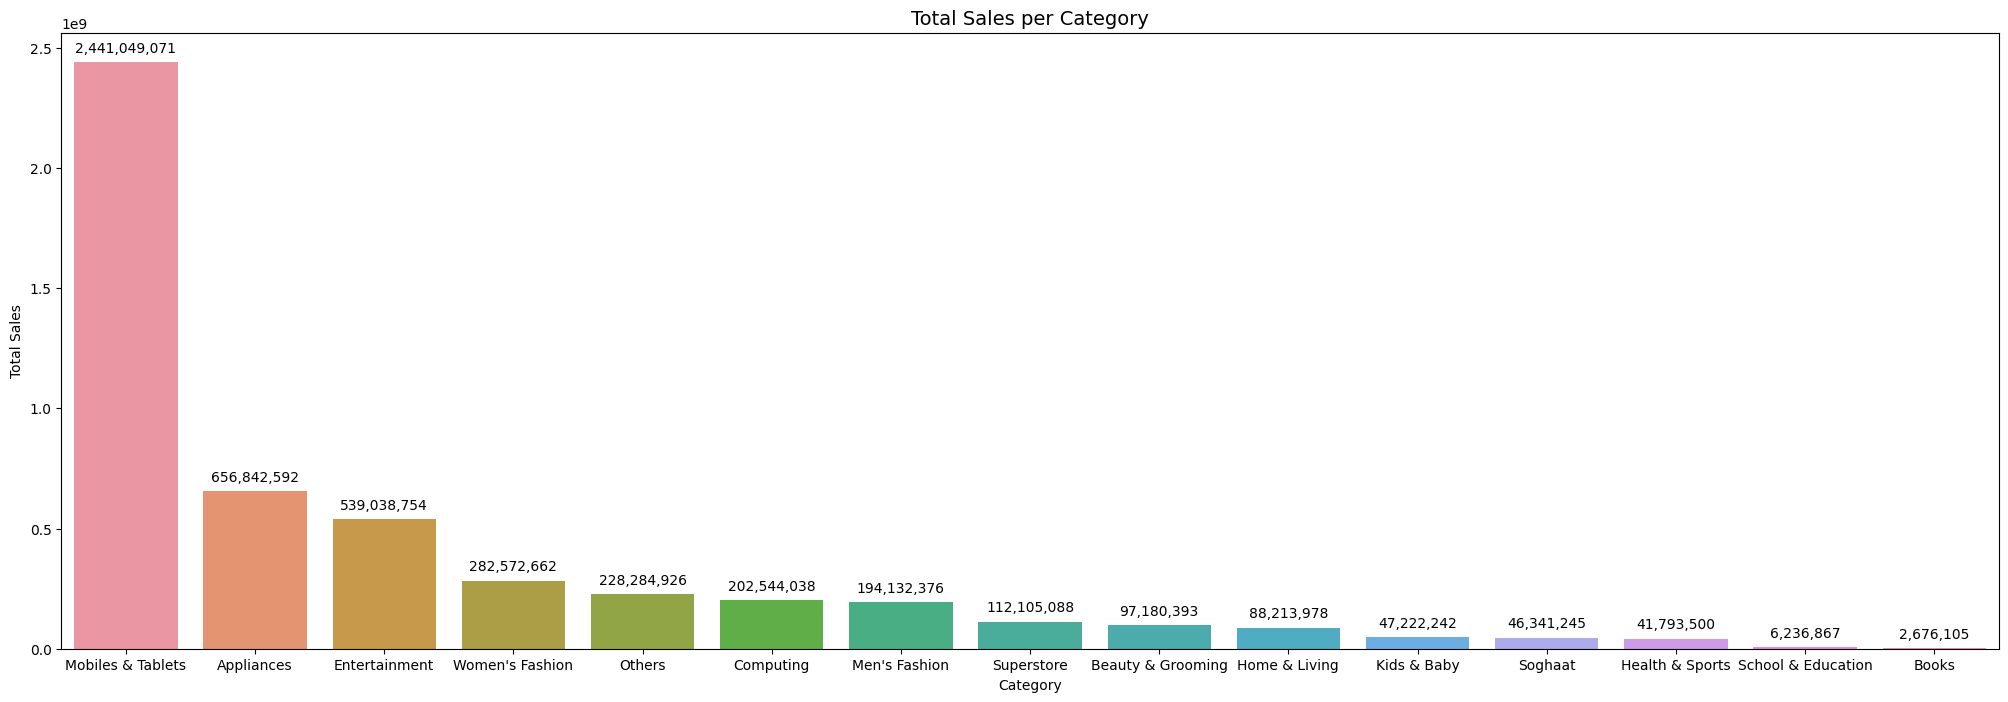

In [67]:
plt.figure(figsize=(25,8))
ax = sns.barplot(
    data=df_sorted,
    x='category',
    y='grand_total',
    errorbar=('ci', 0)# kita ga mau lihat confidence interval nya, jadi 0 aja
    # color='blue'
)

plt.title('Total Sales per Category', size=14)
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 5)
plt.xlabel('Category')
plt.ylabel('Total Sales')

plt.show()

## TOTAL ORDER TREND EACH YEAR and BARPLOT

In [70]:
#Membuat jumlah orderan yang terjadi di setiap tahunya
df_order_trend = df.groupby(by='Year').count()[['created_at']].reset_index().rename(columns={'created_at':'Total Orders'})
df_order_trend['Year'] = df_order_trend['Year'].astype(int)
df_order_trend['Year'] = df_order_trend['Year'].astype(str)
df_order_trend

,Year,Total Orders
0,2016,133909
1,2017,290920
2,2018,159680


In [71]:
df_order_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          3 non-null      object
 1   Total Orders  3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


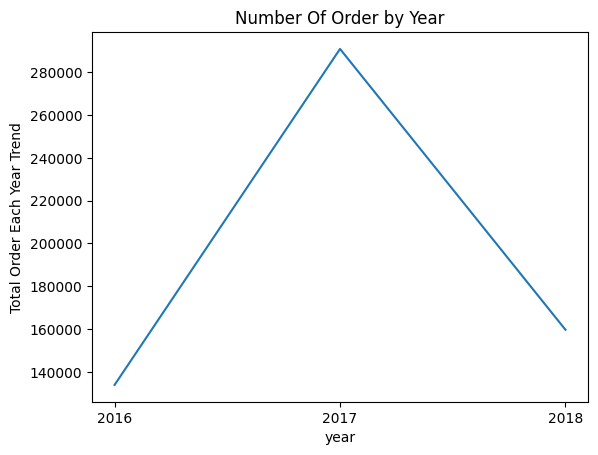

In [72]:
plt.plot(
    df_order_trend['Year'],
    df_order_trend['Total Orders'],
)

plt.xlabel('year')
plt.ylabel('Total Order Each Year Trend')
plt.title('Number Of Order by Year');

Text(0.5, 1.0, 'Total Orders per Year')

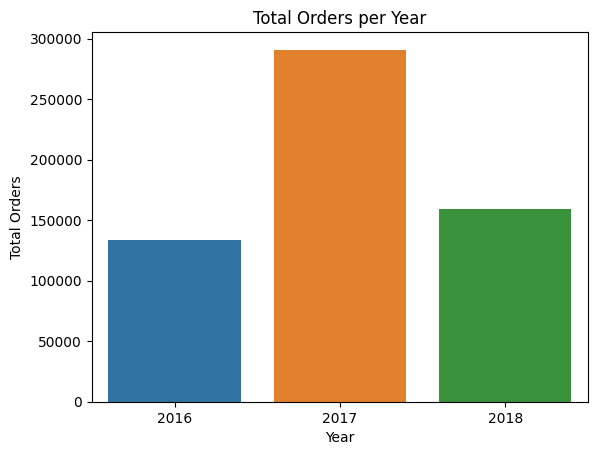

In [73]:
sns.barplot(data = df_order_trend, x='Year',y='Total Orders')
plt.title('Total Orders per Year')

## RETENTION


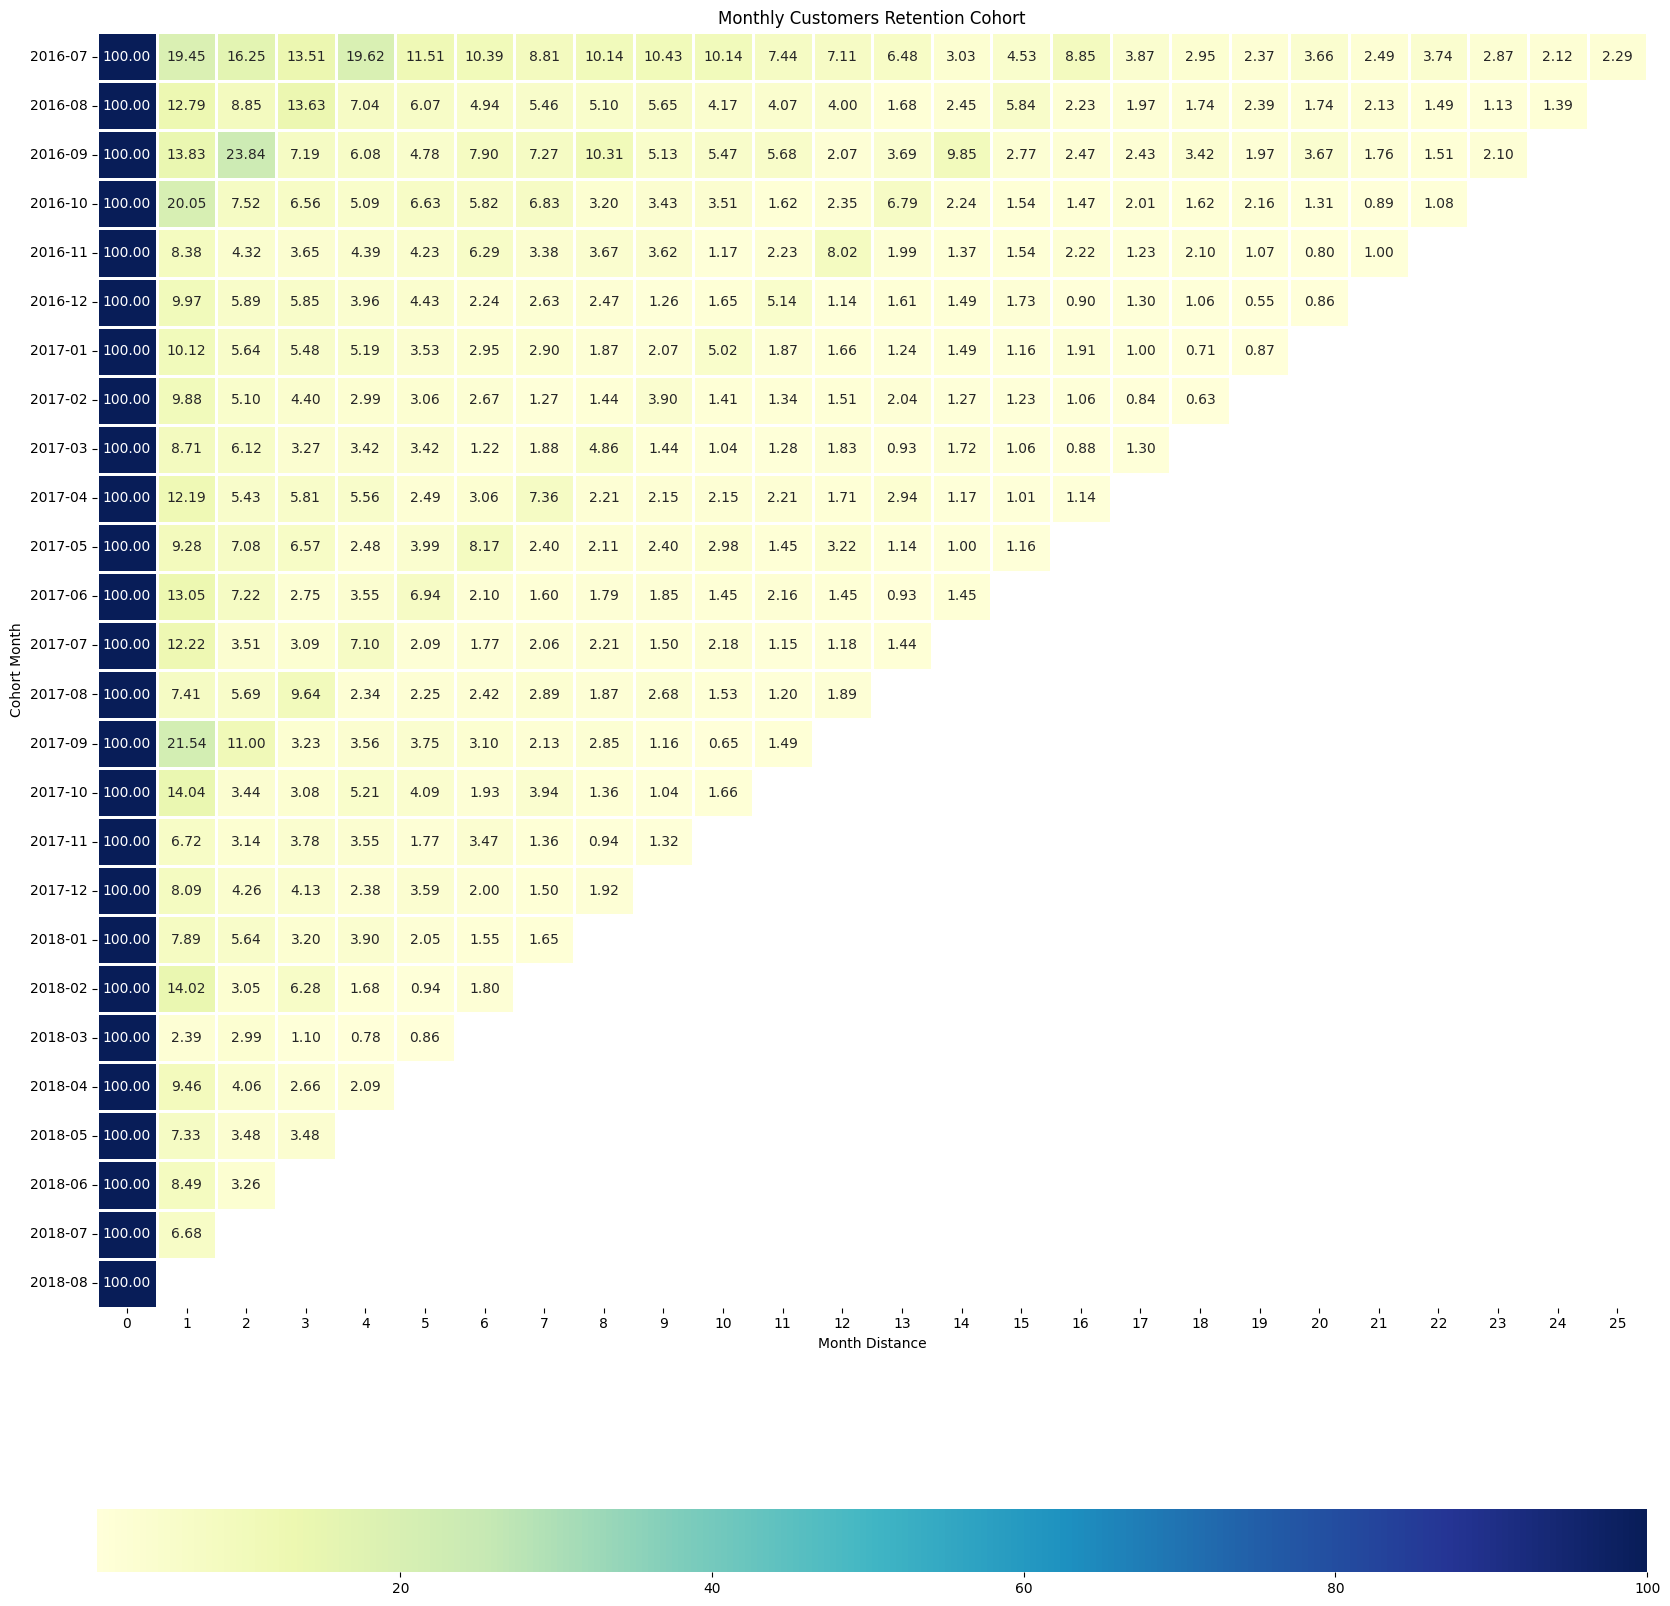

In [74]:
grid_kw = {
    'height_ratios':(20,1),
    'hspace': 0.3
}

fig, (ax_top, ax_bot) = plt.subplots(nrows=2,ncols=1,figsize=(20,20), gridspec_kw=grid_kw)
ax_top = sns.heatmap(
    data= df_cohort_percent,
    cmap='YlGnBu',                                      #Palette warna
    ax= ax_top,                                         #subplot untuk heatmap
    cbar_ax=ax_bot,                                     #subplot untuk color bar
    cbar_kws= {'orientation':'horizontal'},             #mengubah orientasi color bar
    annot=True,                                         #menampilkan anotasi
    fmt='.2f',                                          #format anotasi 2 digit decimal
    linewidths= 2                                       #border antar cell
)

ax_top.set_title('Monthly Customers Retention Cohort')
ax_top.set_xlabel('Month Distance')
ax_top.set_ylabel('Cohort Month');


# Visualitzation Line Plot

In [75]:
#ambil bulan ke 1 dari tiap cohort 
#kemudian di urutkan dari jumlah customer yang paling banyak 

top3 = df_cohort[df_cohort['period_number']==1].sort_values('n_customers_percent', ascending=False).head(3)
top3

,cohort_month,current_order_month,n_customers,period_number,max_customers,n_customers_percent
274,2017-09,2017-10,333,1,1546,21.54
76,2016-10,2016-11,520,1,2593,20.05
1,2016-07,2016-08,468,1,2406,19.45


In [76]:
#ubah menjadi string 
top3['cohort_month'] = top3['cohort_month'].astype(str)
top3['current_order_month'] = top3['current_order_month'].astype(str)

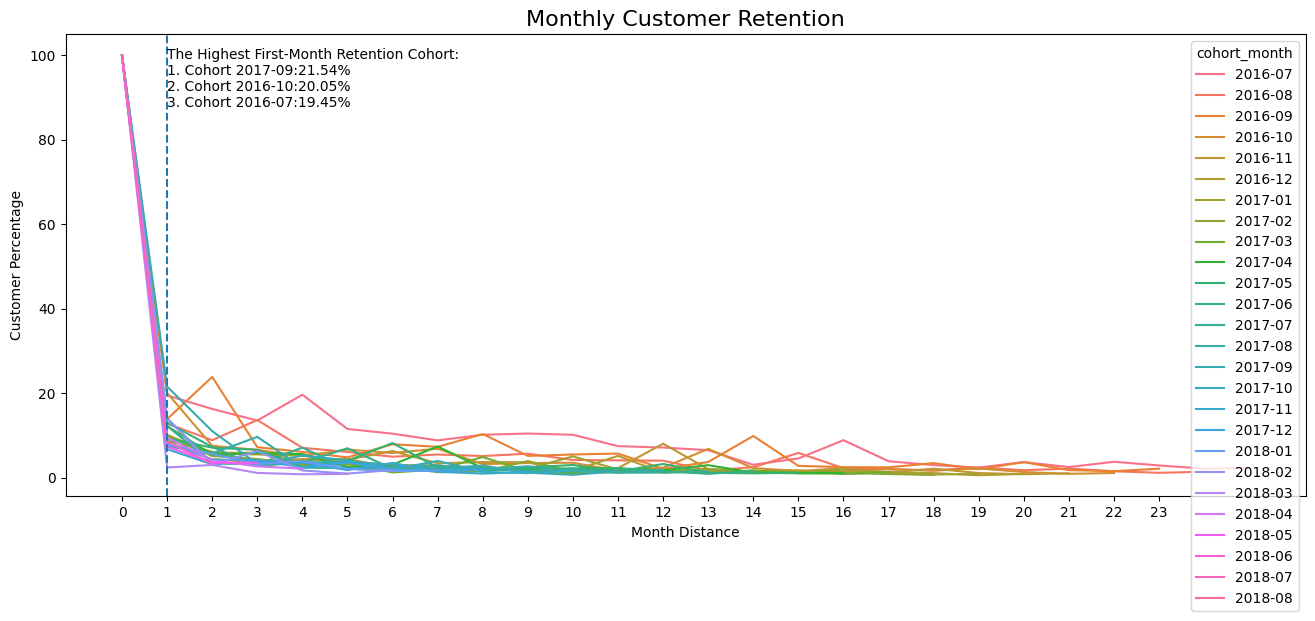

In [77]:
plt.figure(figsize=(16,6))

sns.lineplot(
    data=df_cohort,
    x='period_number',
    y='n_customers_percent',
    hue= 'cohort_month'
)

#menambahkan text didalam figure
text_lineplot= f'''
The Highest First-Month Retention Cohort:
1. Cohort {top3['cohort_month'].iloc[0]}:{top3['n_customers_percent'].iloc[0]}%
2. Cohort {top3['cohort_month'].iloc[1]}:{top3['n_customers_percent'].iloc[1]}%
3. Cohort {top3['cohort_month'].iloc[2]}:{top3['n_customers_percent'].iloc[2]}%

'''
plt.text(x=1, y=80, s=text_lineplot)

#menambahkan garis vertical
plt.axvline(x=1, linestyle='--')

plt.xticks(ticks=range(0,24,1))
plt.title('Monthly Customer Retention', size=16)
plt.xlabel('Month Distance')
plt.ylabel('Customer Percentage')
plt.show()

In [78]:
df.to_csv('Capstone2.3.csv')

In [79]:
df_cohort.to_csv('Cohort_Capstone.csv')